# Домашнее задине по уроку 5

## Тема “Элементы теории вероятностей”

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import itertools

### Задание 1

Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

<img src="roulette_wheel.png" alt="Drawing">

In [2]:
red = [32,19,21,25,34,27,36,30,23,5,16,1,14,9,18,7,12,3]
for i in range(0, 5):
    a = input()
    x = np.random.randint(0, 37)
    if x == 0:
        print("Zero")
    else:
        if x in red:
            print(x, 'красное')
        else:
            print(x, 'черное')


11 черное

6 черное

9 красное

10 черное

32 красное


### Задание 2

1. Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.
2. Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

Вероятность выпадения числа в рулетке равна 1/37, следовательно вероятность выпадение двух чисел будет 1/37 + 1/37 = 2/37 ≈ 0.05405405405.

Пусть это будут числа 5 и 6. 

In [3]:
result = 0
for i in range(100000):
    x = np.random.randint(0, 37)
    if x == 5 or x == 6:
        result += 1
print(result/100000)

0.05243


0.05404 ≈ 0.05405

Text(0.5, 1.0, 'Histogram')

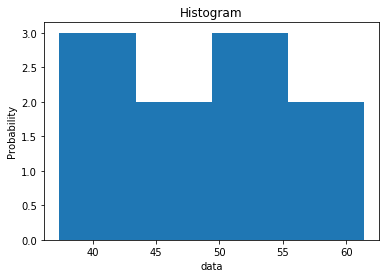

In [4]:
data = [0 for i in range(10)]
for i in range(10):
    k = 0
    for j in range(10):
        k += np.random.uniform(0, 10)
    data[i] = k
    
num_bins = 4
n, bins, patches = plt.hist(data, num_bins)
plt.xlabel('data')
plt.ylabel('Probability')
plt.title('Histogram')

### Задание 3

1. Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.
2. Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

Метод Монте-Карло

In [5]:
k, n = 0, 100
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
#print(a, b, c, d)
#print(x)
print(k, n, k/n)

35 100 0.35


In [6]:
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

In [13]:
p = 1
q = 0

In [14]:
N = 4
K = 2
Ckn = factorial(N) / factorial(K) / factorial(N - K)
P = Ckn * p**k * q**(n - k)
Ckn, P

(6.0, 0.0)

In [15]:
N = 12
K = 4
Ckn = factorial(N) / factorial(K) / factorial(N - K)
P = Ckn * p**k * q**(n - k)
Ckn, P

(495.0, 0.0)

### Задание 4

Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [20]:
for p in itertools.permutations("012345",repeat=6):
    print(''.join(str(x) for x in p))

TypeError: 'repeat' is an invalid keyword argument for permutations()

Остальное доделываю. Сегодня будет.